In [2]:
%pip install scikit-learn lightgbm hyperopt plotly seaborn xgboost ydata-profiling

  Using cached ydata_profiling-4.18.0-py2.py3-none-any.whl (398 kB)
  Using cached minify_html-0.18.1-cp310-cp310-win_amd64.whl (3.1 MB)
  Using cached numba-0.62.1-cp310-cp310-win_amd64.whl (2.7 MB)
  Using cached ImageHash-4.3.2-py2.py3-none-any.whl (296 kB)
  Using cached wordcloud-1.9.5-cp310-cp310-win_amd64.whl (306 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl (19 kB)
  Using cached statsmodels-0.14.6-cp310-cp310-win_amd64.whl (9.6 MB)
  Using cached typeguard-4.4.4-py3-none-any.whl (34 kB)
  Using cached dacite-1.9.2-py3-none-any.whl (16 kB)
  Using cached phik-0.12.5-cp310-cp310-win_amd64.whl (674 kB)
  Using cached pydantic-2.12.5-py3-none-any.whl (463 kB)
  Using cached llvmlite-0.45.1-cp310-cp310-win_amd64.whl (38.1 MB)
  Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\Users\anitp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from ydata_profiling import ProfileReport as pp
from sklearn.metrics import accuracy_score, classification_report

# models
from sklearn.linear_model import LinearRegression, SGDRegressor, RidgeCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, RandomForestClassifier 
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, VotingRegressor 
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
import sklearn.model_selection
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.cluster import KMeans
import xgboost as xgb
import lightgbm as lgb
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA as PCA
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
from matplotlib import cm
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# model tuning
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe, space_eval

import warnings
warnings.filterwarnings("ignore")

c:\Users\anitp\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\anitp\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sergiykovalchuck/the-most-popular-books-for-exchanging")

print("Path to dataset files:", path)

100%|██████████| 87.1k/87.1k [00:00<00:00, 180kB/s]

Extracting files...
Path to dataset files: C:\Users\anitp\.cache\kagglehub\datasets\sergiykovalchuck\the-most-popular-books-for-exchanging\versions\1


In [9]:
import os
import pandas as pd

dataset_dir = r"C:\Users\anitp\.cache\kagglehub\datasets\sergiykovalchuck\the-most-popular-books-for-exchanging\versions\1"

csv_path = os.path.join(dataset_dir, "top_1000_most_swapped_books.csv")
df = pd.read_csv(csv_path)

nan_counts = df.isna().sum()
print("NaN counts per column:")
print(nan_counts)

print("\nDatatypes per column:")
print(df.dtypes)


NaN counts per column:
id                        0
title                     0
author                    0
genre                     0
language                  0
publicationYear           0
publisher                 0
description               0
pageCount                 0
tags                      0
rating_average            0
most_popular_country      0
bestseller_status         0
awards                  606
age_category              0
adapted_to_movie          0
movie_release_year      348
isbn                      0
dtype: int64

Datatypes per column:
id                        int64
title                    object
author                   object
genre                    object
language                 object
publicationYear           int64
publisher                object
description              object
pageCount                 int64
tags                     object
rating_average          float64
most_popular_country     object
bestseller_status          bool
awards               

In [10]:
df.head()

,id,title,author,genre,language,publicationYear,publisher,description,pageCount,tags,rating_average,most_popular_country,bestseller_status,awards,age_category,adapted_to_movie,movie_release_year,isbn
0,1,Harry Potter and the Sorcerer's Stone,J.K. Rowling,Fantasy,English,1997,Bloomsbury,A young wizard discovers his magical heritage ...,309,"magic,school,adventure",4.89,UK,True,"Smarties Prize,British Book Award",Children,True,2001.0,978-0747532743
1,2,To Kill a Mockingbird,Harper Lee,Southern Gothic,English,1960,J.B. Lippincott & Co.,A lawyer in the Depression-era South defends a...,281,"classic,law,racism,history",4.85,USA,True,Pulitzer Prize,Adult,True,1962.0,978-0061120084
2,3,1984,George Orwell,Dystopian,English,1949,Secker & Warburg,A dystopian social science fiction novel and c...,328,"politics,scifi,totalitarianism",4.80,UK,True,Prometheus Hall of Fame,Adult,True,1984.0,978-0451524935
3,4,The Great Gatsby,F. Scott Fitzgerald,Tragedy,English,1925,Charles Scribner's Sons,A story of the fabulously wealthy Jay Gatsby a...,180,"classic,wealth,romance,jazz age",4.40,USA,True,NaN,Adult,True,2013.0,978-0743273565
4,5,The Hobbit,J.R.R. Tolkien,Fantasy,English,1937,George Allen & Unwin,"Bilbo Baggins, a hobbit, is swept into an epic...",310,"adventure,dragons,magic",4.75,UK,True,Keith Barker Millennium Book Award,Children,True,2012.0,978-0547928227


In [11]:
df.isna().sum()


id                        0
title                     0
author                    0
genre                     0
language                  0
publicationYear           0
publisher                 0
description               0
pageCount                 0
tags                      0
rating_average            0
most_popular_country      0
bestseller_status         0
awards                  606
age_category              0
adapted_to_movie          0
movie_release_year      348
isbn                      0
dtype: int64

In [12]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    990 non-null    int64  
 1   title                 990 non-null    object 
 2   author                990 non-null    object 
 3   genre                 990 non-null    object 
 4   language              990 non-null    object 
 5   publicationYear       990 non-null    int64  
 6   publisher             990 non-null    object 
 7   description           990 non-null    object 
 8   pageCount             990 non-null    int64  
 9   tags                  990 non-null    object 
 10  rating_average        990 non-null    float64
 11  most_popular_country  990 non-null    object 
 12  bestseller_status     990 non-null    bool   
 13  awards                384 non-null    object 
 14  age_category          990 non-null    object 
 15  adapted_to_movie      9

,id,publicationYear,pageCount,rating_average,movie_release_year
count,990.000000,990.000000,990.000000,990.000000,642.000000
mean,502.079798,1962.996970,378.904040,4.061949,1997.704050
std,289.286296,195.433466,190.567626,0.241120,22.531925
min,1.000000,-750.000000,22.000000,3.140000,1926.000000
25%,252.250000,1965.250000,256.000000,3.920000,1987.000000
50%,503.500000,1997.000000,341.500000,4.070000,2005.000000
75%,752.750000,2010.000000,452.750000,4.220000,2015.000000
max,1003.000000,2023.000000,1463.000000,4.950000,2025.000000


In [13]:
df_clf = df.drop(columns=[
    'id', 'title', 'description', 'tags', 'isbn', 'awards'
])


In [14]:
X = df_clf.drop('bestseller_status', axis=1)
y = df_clf['bestseller_status']


In [15]:
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])


In [16]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9949494949494949
              precision    recall  f1-score   support

       False       0.00      0.00      0.00         1
        True       0.99      1.00      1.00       197

    accuracy                           0.99       198
   macro avg       0.50      0.50      0.50       198
weighted avg       0.99      0.99      0.99       198



In [19]:
y.value_counts()
y.value_counts(normalize=True)


bestseller_status
True     0.99596
False    0.00404
Name: proportion, dtype: float64

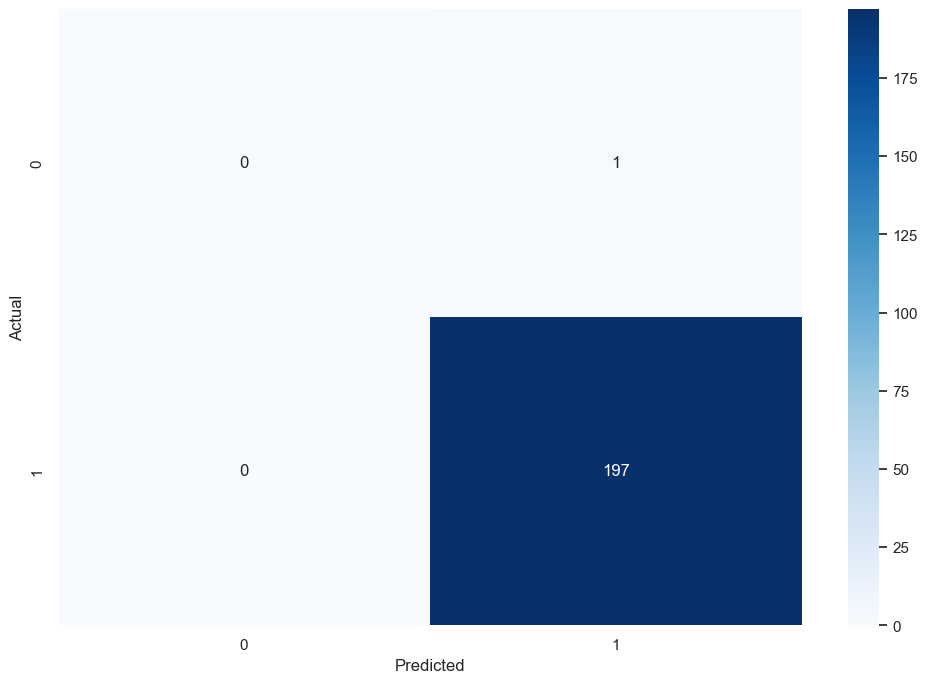

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [21]:
from sklearn.metrics import balanced_accuracy_score

print("Balanced Accuracy:",
      balanced_accuracy_score(y_test, y_pred))


Balanced Accuracy: 0.5


In [22]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    scale_pos_weight=(y_train == False).sum() / (y_train == True).sum(),
    random_state=42,
    eval_metric='logloss'
)

xgb_clf.fit(X_train, y_train)
y_pred_xgb = xgb_clf.predict(X_test)

print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

       False       0.01      1.00      0.01         1
        True       0.00      0.00      0.00       197

    accuracy                           0.01       198
   macro avg       0.00      0.50      0.01       198
weighted avg       0.00      0.01      0.00       198



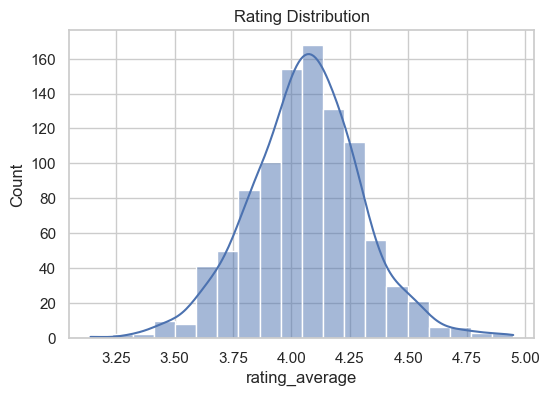

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df['rating_average'], bins=20, kde=True)
plt.title("Rating Distribution")
plt.show()


In [24]:
df.isna().sum().sort_values(ascending=False)


awards                  606
movie_release_year      348
title                     0
id                        0
author                    0
genre                     0
publisher                 0
description               0
language                  0
publicationYear           0
tags                      0
pageCount                 0
most_popular_country      0
rating_average            0
bestseller_status         0
age_category              0
adapted_to_movie          0
isbn                      0
dtype: int64

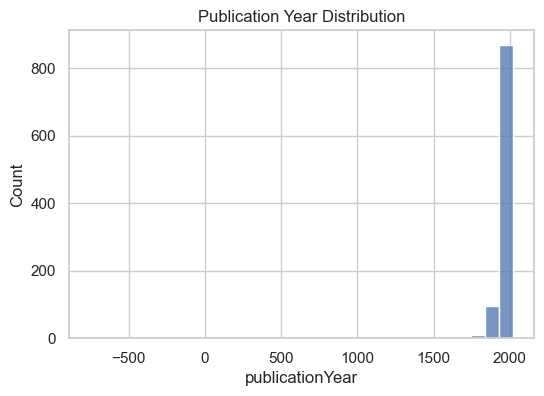

In [25]:
plt.figure(figsize=(6,4))
sns.histplot(df['publicationYear'], bins=30)
plt.title("Publication Year Distribution")
plt.show()


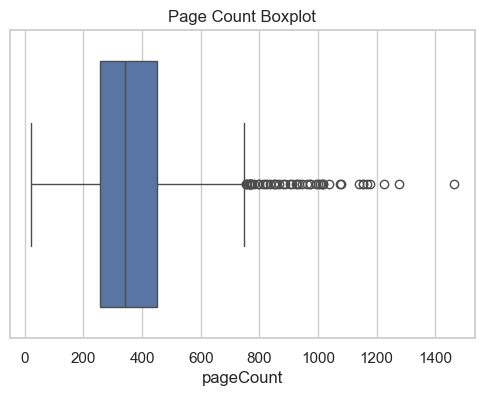

In [26]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['pageCount'])
plt.title("Page Count Boxplot")
plt.show()


In [27]:
df['genre'].value_counts().head(10)


genre
Fantasy               155
Sci-Fi                 91
Historical Fiction     75
Fiction                69
Thriller               66
Romance                57
Children's Fiction     47
Horror                 36
Dystopian              31
Mystery                30
Name: count, dtype: int64

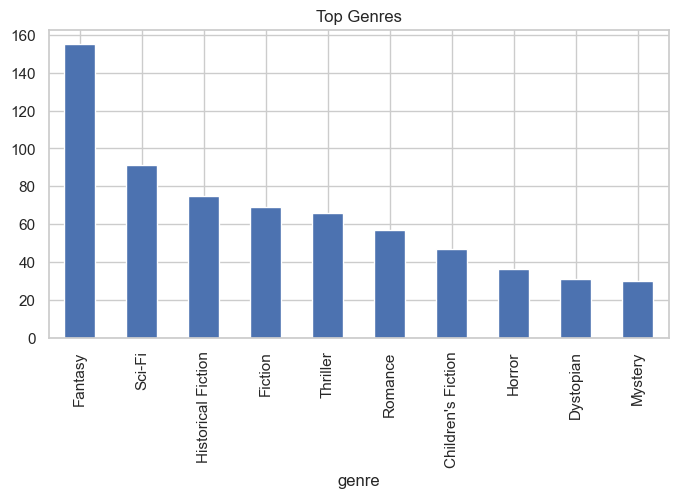

In [28]:
plt.figure(figsize=(8,4))
df['genre'].value_counts().head(10).plot(kind='bar')
plt.title("Top Genres")
plt.show()


In [29]:
df['language'].value_counts()


language
English        957
German           7
Japanese         7
French           5
Russian          3
Norwegian        3
Korean           2
Spanish          1
Swedish          1
Greek            1
Old English      1
Italian          1
Latin            1
Name: count, dtype: int64

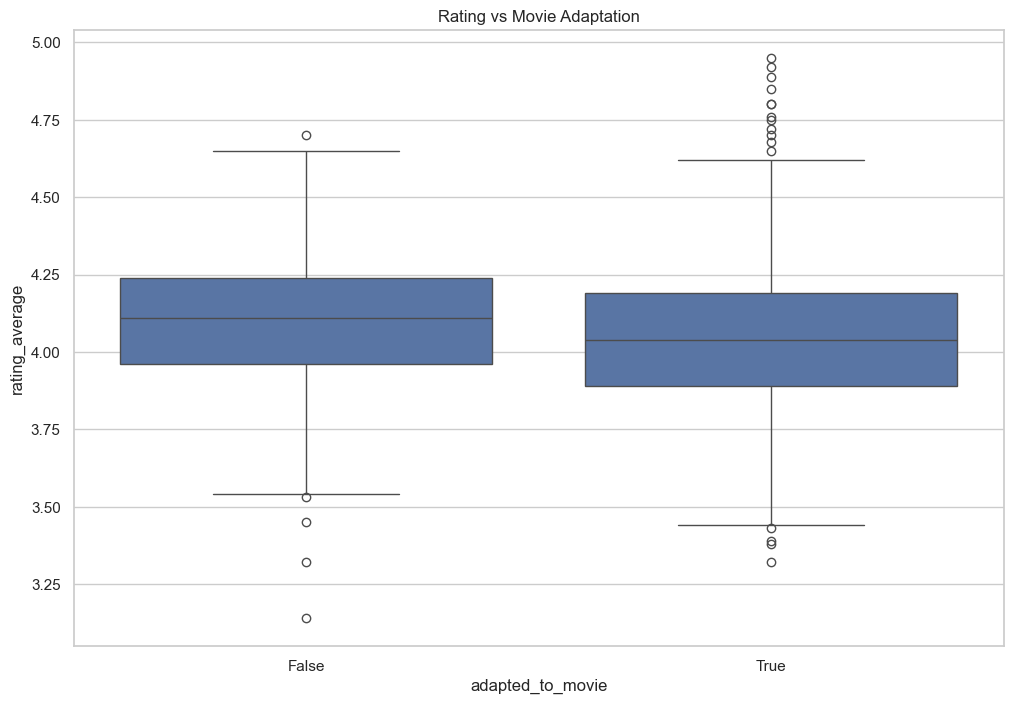

In [30]:
sns.boxplot(x='adapted_to_movie', y='rating_average', data=df)
plt.title("Rating vs Movie Adaptation")
plt.show()


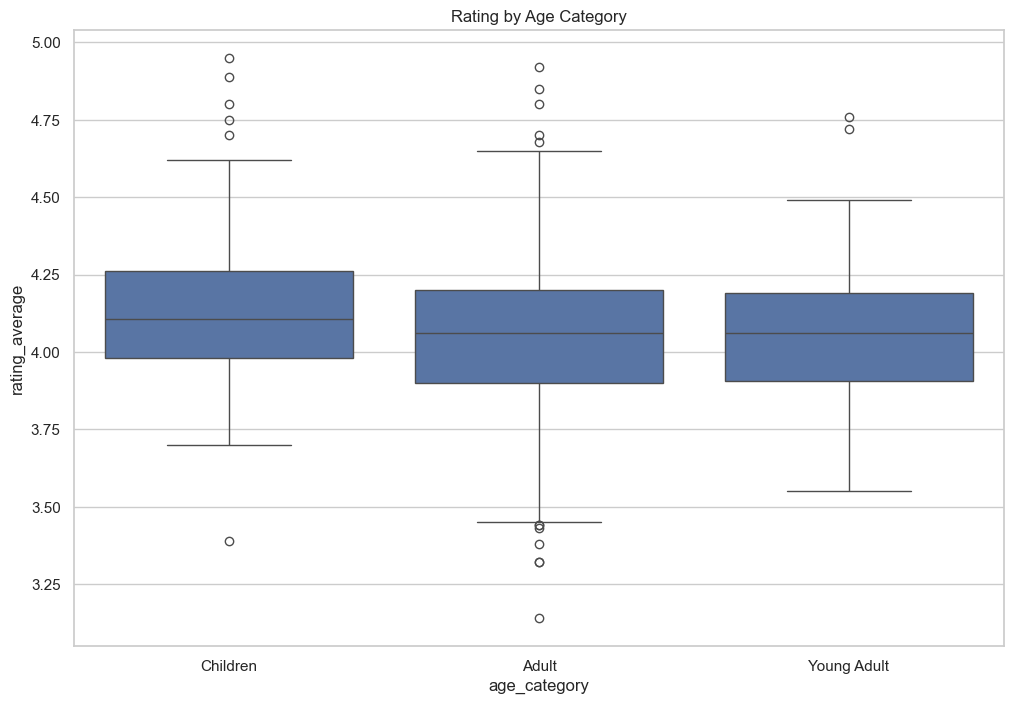

In [31]:
sns.boxplot(x='age_category', y='rating_average', data=df)
plt.title("Rating by Age Category")
plt.show()


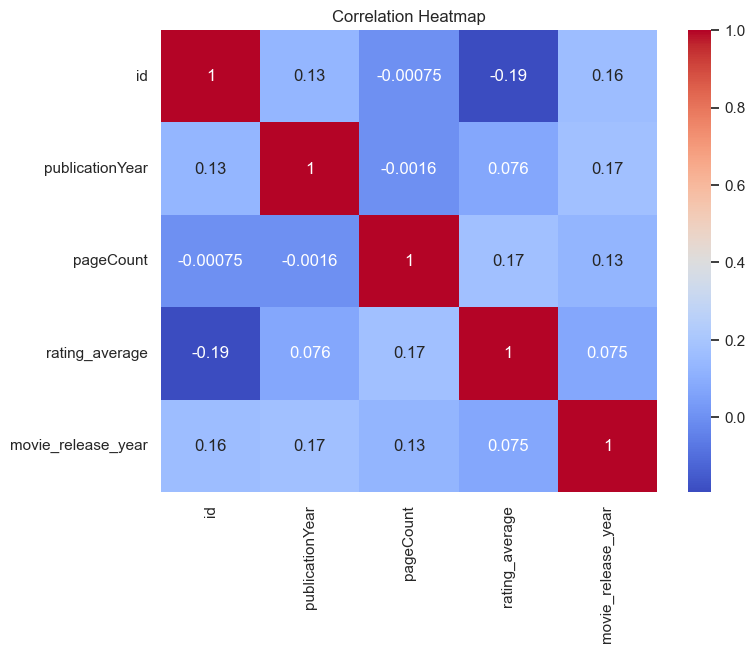

In [32]:
num_df = df.select_dtypes(include=['int64','float64'])

plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
target = 'rating_average'


In [33]:
df_reg = df.drop(columns=[
    'id', 'title', 'description', 'tags', 'isbn', 'awards', 'bestseller_status'
])


In [34]:
X = df_reg.drop('rating_average', axis=1)
y = df_reg['rating_average']


In [35]:
from sklearn.impute import SimpleImputer

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns
bool_cols = X.select_dtypes(include=['bool']).columns

# Numerical → median
X[num_cols] = SimpleImputer(strategy='median').fit_transform(X[num_cols])

# Categorical → most frequent
X[cat_cols] = SimpleImputer(strategy='most_frequent').fit_transform(X[cat_cols])


In [36]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

lr = LinearRegression()
lr.fit(X_train, y_train)

pred_lr = lr.predict(X_test)

print("Linear Regression")
print("R2:", r2_score(y_test, pred_lr))
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_lr)))


Linear Regression
R2: -0.7150390303259246
MAE: 0.22113085966995463
RMSE: 0.3043838145295907


In [39]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("Random Forest")
print("R2:", r2_score(y_test, pred_rf))
print("MAE:", mean_absolute_error(y_test, pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred_rf)))


Random Forest
R2: 0.24691643308381028
MAE: 0.14999124579124581
RMSE: 0.20170011078667768


In [40]:
import pandas as pd

importances = pd.Series(
    rf.feature_importances_, index=X.columns
).sort_values(ascending=False)

importances.head(10)


pageCount                  0.137873
publicationYear            0.133476
movie_release_year         0.049643
genre_Fantasy              0.031340
publisher_Jonathan Cape    0.027069
author_J.K. Rowling        0.020310
genre_Memoir               0.014359
author_George Orwell       0.013933
author_Stephenie Meyer     0.013169
age_category_Children      0.012201
dtype: float64

In [ ]:
df2 = df.copy()


df2 = df2[df2["publicationYear"].between(1400, 2025)]


df2.loc[~df2["movie_release_year"].isna(), "movie_release_year"] = \
    df2.loc[~df2["movie_release_year"].isna(), "movie_release_year"].clip(1900, 2026)


In [43]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.ensemble import RandomForestRegressor

df2 = df.copy()
df2 = df2[df2["publicationYear"].between(1400, 2025)]

y = df2["rating_average"]
X = df2.drop(columns=["rating_average", "bestseller_status", "isbn", "awards", "id", "title"])

num_cols  = ["publicationYear", "pageCount", "movie_release_year"]
cat_cols  = ["author", "genre", "language", "publisher", "most_popular_country", "age_category", "adapted_to_movie"]
text_col  = ["tags"]  # MUST be list

# helper: DataFrame -> 1D array of strings for TFIDF
to_1d = FunctionTransformer(lambda x: x.squeeze().astype(str), feature_names_out="one-to-one")

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="median"))
        ]), num_cols),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("onehot", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),

        ("txt", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("to1d", to_1d),
            ("tfidf", TfidfVectorizer(max_features=3000, ngram_range=(1,2)))
        ]), text_col),
    ],
    remainder="drop"
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=600,
    random_state=42,
    n_jobs=-1,
    min_samples_leaf=2
)

pipe = Pipeline([("prep", preprocess), ("model", model)])
pipe.fit(X_train, y_train)

pred = pipe.predict(X_test)
print("R2:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))


R2: 0.3046709363918991
MAE: 0.1525379817580903
RMSE: 0.19648064305374044


In [45]:
import lightgbm as lgb

pipe_lgb = Pipeline([
    ("prep", preprocess),
    ("model", lgb.LGBMRegressor(
        n_estimators=3000,
        learning_rate=0.03,
        num_leaves=63,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ))
])

pipe_lgb.fit(X_train, y_train)
pred = pipe_lgb.predict(X_test)

print("R2:", r2_score(y_test, pred))
print("MAE:", mean_absolute_error(y_test, pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 872
[LightGBM] [Info] Number of data points in the train set: 785, number of used features: 53
[LightGBM] [Info] Start training from score 4.069732
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

In [46]:
text_col = ["tags", "description"]


In [47]:
# Low / Medium / High rating
df["rating_class"] = pd.cut(
    df["rating_average"],
    bins=[0, 3.8, 4.2, 5],
    labels=["Low", "Medium", "High"]
)


In [48]:
from sklearn.model_selection import cross_val_score
cv_r2 = cross_val_score(pipe, X, y, cv=5, scoring="r2")
cv_r2.mean()


np.float64(0.12367803432880276)